In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [45]:
df = pd.read_csv('CarData_Final.csv')
df

,Price,Name,Kilometers_Driven,Last_Service,Registration,Registered_in,Fuel_Type,Transmission,Insurance,Airbags,...,Engine_type,Drivetrain,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity,Seating_capacity,Alternate_fuel_type,History
0,"Fixed Price\n₹3,37,599",2019 Maruti Alto 800 LXI MANUAL,"79,205 km","79,205km (28 Aug 2022)",GJ-17-x-xxxx,May-19,Petrol + CNG,MANUAL,Valid upto May 55660\n3rd Party,NaN,...,F8D,FWD,24.7,Power assisted (Electric),Manual,48,35,5,NaN,Non-Accidental
1,"Fixed Price\n₹10,56,899",2020 Maruti S Cross ZETA AT 1.5 SHVS,"11,707 km","11,707km (27 Jul 2022)",WB-06-x-xxxx,Dec-20,Petrol,NaN,Valid upto May 55660\n3rd Party,-,...,-,-,-,-,-,-,-,-,-,Non-Accidental
2,"Fixed Price\n₹15,89,699",2019 Honda Civic VX CVT i-VTEC,"13,878 km","13,878km (18 Jul 2022)",MH-02-x-xxxx,NaN,Petrol,NaN,Valid upto May 55660\n3rd Party,"4 Airbags (Driver, Front Passenger, Driver Sid...",...,"4 Cylinder, SOHC iVTEC",FWD,16.5,Power assisted (Electric),Automatic,140,47,5,NaN,Non-Accidental
3,"Fixed Price\n₹18,79,099",2020 MG HECTOR PLUS SHARP DCT,"11,086 km","11,086km (29 Aug 2022)",MH-14-x-xxxx,Aug-20,Petrol,NaN,Valid upto May 55660\n3rd Party,"6 Airbags (Driver, Front Passenger, 2 Curtain,...",...,1.5L Turbocharged Intercooled,FWD,NaN,Power assisted (Electric),Automatic,141,60,6,NaN,Non-Accidental
4,"Fixed Price\n₹7,08,299",2018 Maruti Swift ZXI AMT AUTOMATIC,"41,249 km","41,249km (08 Sep 2022)",TN-14-x-xxxx,Aug-18,Petrol,AUTOMATIC,Valid upto May 55660\n3rd Party,"2 Airbags (Driver, Front Passenger)",...,1.2 L VVT,FWD,21.21,Power assisted (Electric),Automatic,82,37,5,NaN,Non-Accidental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,"Fixed Price\n₹6,43,699",2019 Tata Tiago XZ+ 1.2 Revotron MANUAL,"36,655 km","36,655km (16 Jul 2022)",KA-03-x-xxxx,Feb-19,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,"2 Airbags (Driver, Front Passenger)",...,"Revotron, MPFi with MULTI DRIVE",FWD,23.84,Power assisted (Electric),Manual,84,35,5,NaN,Non-Accidental
4405,"Fixed Price\n₹6,04,199",2016 Maruti Baleno ZETA 1.2 K12 CVT AUTOMATIC,"69,472 km","69,472km (03 Jul 2022)",MH-02-x-xxxx,NaN,Petrol,AUTOMATIC,Valid upto Feb 55663\n3rd Party,"2 Airbags (Driver, Front Passenger)",...,1.2L VVT Engine,NaN,19.56,Electric,Automatic,81.8,37,5,NaN,Non-Accidental
4406,"Fixed Price\n₹8,53,599",2021 Maruti Vitara Brezza LXI MANUAL,"5,091 km","5,091km (02 Sep 2022)",MH-03-x-xxxx,Oct-21,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,"2 Airbags (Driver, Front Passenger)",...,K15B Petrol Engine,NaN,17.03,Electronic,Manual,103.26,48,5,NaN,Non-Accidental
4407,"Fixed Price\n₹6,03,699",2017 Maruti Dzire VXI MANUAL,"29,104 km","29,104km (31 Jul 2022)",MH-02-x-xxxx,Nov-17,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,"2 Airbags (Driver, Front Passenger)",...,KSeries Petrol engine with VVT,FWD,21.21,Power assisted (Electric),Manual,82,37,5,NaN,Non-Accidental


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4409 non-null   object
 1   Name                 4409 non-null   object
 2   Kilometers_Driven    4409 non-null   object
 3   Last_Service         4409 non-null   object
 4   Registration         4409 non-null   object
 5   Registered_in        3844 non-null   object
 6   Fuel_Type            4409 non-null   object
 7   Transmission         4279 non-null   object
 8   Insurance            4409 non-null   object
 9   Airbags              2290 non-null   object
 10  Seat_Upholstery      900 non-null    object
 11  Integrated_Music     3580 non-null   object
 12  Rear_View_Mirrors    362 non-null    object
 13  Engine_start_stop    1502 non-null   object
 14  Central_Locking      3925 non-null   object
 15  Sunroof_Moonroof     681 non-null    object
 16  Rear_A

In [47]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['Price', 'Name', 'Kilometers_Driven', 'Last_Service', 'Registration', 'Registered_in', 'Fuel_Type', 'Transmission', 'Insurance', 'Airbags', 'Seat_Upholstery', 'Integrated_Music', 'Rear_View_Mirrors', 'Engine_start_stop', 'Central_Locking', 'Sunroof_Moonroof', 'Rear_AC', 'Power_Windows', 'Headlamps', 'Fuel_type', 'Engine_type', 'Drivetrain', 'Mileage', 'Steering_type', 'Transmission_type', 'Max_power', 'Fuel_tank_capacity', 'Seating_capacity', 'Alternate_fuel_type', 'History']


In [48]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

Registered_in column has 565 NaN values
Transmission column has 130 NaN values
Airbags column has 2119 NaN values
Seat_Upholstery column has 3509 NaN values
Integrated_Music column has 829 NaN values
Rear_View_Mirrors column has 4047 NaN values
Engine_start_stop column has 2907 NaN values
Central_Locking column has 484 NaN values
Sunroof_Moonroof column has 3728 NaN values
Rear_AC column has 3081 NaN values
Power_Windows column has 152 NaN values
Headlamps column has 284 NaN values
Engine_type column has 219 NaN values
Drivetrain column has 109 NaN values
Mileage column has 60 NaN values
Steering_type column has 239 NaN values
Fuel_tank_capacity column has 12 NaN values
Alternate_fuel_type column has 4041 NaN values


In [49]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Price column has 2945 categorical data counts

Name column has 1451 categorical data counts

Kilometers_Driven column has 3383 categorical data counts

Last_Service column has 3461 categorical data counts

Registration column has 360 categorical data counts

Registered_in column has 150 categorical data counts

Fuel_Type column has 3 categorical data counts

Transmission column has 2 categorical data counts

Insurance column has 58 categorical data counts

Airbags column has 13 categorical data counts

Seat_Upholstery column has 5 categorical data counts

Integrated_Music column has 3 categorical data counts

Rear_View_Mirrors column has 5 categorical data counts

Engine_start_stop column has 5 categorical data counts

Central_Locking column has 9 categorical data counts

Sunroof_Moonroof column has 6 categorical data counts

Rear_AC column has 16 categorical data counts

Power_Windows column has 7 categorical data counts

Headlamps column has 22 categorical data counts

Fuel_type colu

In [50]:
df.columns

Index(['Price', 'Name', 'Kilometers_Driven', 'Last_Service', 'Registration',
       'Registered_in', 'Fuel_Type', 'Transmission', 'Insurance', 'Airbags',
       'Seat_Upholstery', 'Integrated_Music', 'Rear_View_Mirrors',
       'Engine_start_stop', 'Central_Locking', 'Sunroof_Moonroof', 'Rear_AC',
       'Power_Windows', 'Headlamps', 'Fuel_type', 'Engine_type', 'Drivetrain',
       'Mileage', 'Steering_type', 'Transmission_type', 'Max_power',
       'Fuel_tank_capacity', 'Seating_capacity', 'Alternate_fuel_type',
       'History'],
      dtype='object')

In [52]:
df['Central_Locking'] = df['Central_Locking'].replace({'remote':'Remote','yes':'Yes','YES':'Yes'})
df['Sunroof_Moonroof'] = df['Sunroof_Moonroof'].fillna('No')
df['Headlamps'] = df['Headlamps'].replace({'Projector Halogen':'Halogen Projector','Projector with xenon':'Projector with Xenon','halogen projector':'Halogen Projector','Bi-Xenon Projector':'BiXenon Projector','XeN/An Projector':'Projector with Xenon','Projector with xenon':'Projector with Xenon'})
df = df.replace({'-':np.nan})

cleaning the data using .replace and .fillna method

In [53]:
df = df.drop(['Registered_in', 'Airbags', 'Seat_Upholstery', 'Integrated_Music', 'Rear_View_Mirrors', 'Engine_start_stop', 'Rear_AC', 'Alternate_fuel_type'],axis=1)

- dropped 'Registered_in', 'Airbags', 'Seat_Upholstery', 'Integrated_Music', 'Rear_View_Mirrors', 'Engine_start_stop', 'Rear_AC' and 'Alternate_fuel_type' columnn as it has a lot of NaNs as it may affect the result of the model

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Price               4409 non-null   object
 1   Name                4409 non-null   object
 2   Kilometers_Driven   4409 non-null   object
 3   Last_Service        4409 non-null   object
 4   Registration        4409 non-null   object
 5   Fuel_Type           4409 non-null   object
 6   Transmission        4279 non-null   object
 7   Insurance           4409 non-null   object
 8   Central_Locking     3569 non-null   object
 9   Sunroof_Moonroof    4053 non-null   object
 10  Power_Windows       3900 non-null   object
 11  Headlamps           3768 non-null   object
 12  Fuel_type           4409 non-null   object
 13  Engine_type         3836 non-null   object
 14  Drivetrain          3946 non-null   object
 15  Mileage             3987 non-null   object
 16  Steering_type       3816

In [55]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['Price', 'Name', 'Kilometers_Driven', 'Last_Service', 'Registration', 'Fuel_Type', 'Transmission', 'Insurance', 'Central_Locking', 'Sunroof_Moonroof', 'Power_Windows', 'Headlamps', 'Fuel_type', 'Engine_type', 'Drivetrain', 'Mileage', 'Steering_type', 'Transmission_type', 'Max_power', 'Fuel_tank_capacity', 'Seating_capacity', 'History']


In [56]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

Transmission column has 130 NaN values
Central_Locking column has 840 NaN values
Sunroof_Moonroof column has 356 NaN values
Power_Windows column has 509 NaN values
Headlamps column has 641 NaN values
Engine_type column has 573 NaN values
Drivetrain column has 463 NaN values
Mileage column has 422 NaN values
Steering_type column has 593 NaN values
Transmission_type column has 354 NaN values
Max_power column has 354 NaN values
Fuel_tank_capacity column has 366 NaN values
Seating_capacity column has 354 NaN values
History column has 1 NaN values


In [66]:
df = df.drop(['Central_Locking', 'Headlamps','Engine_type','History'],axis=1)

dropped 'Central_Locking', 'Headlamps','Engine_type' and 'History' columnn as it has a lot of NaNs and it may affect the result of the model

In [60]:
df['Steering_type'] = df['Steering_type'].replace({'power assisted (Hydraulic)':'Power assisted (Hydraulic)','Electrical':'Electric','Electronic':'Electric','power':'Power','power assisted (Electric)':'Power assisted (Electric)','power assisted (electric)':'Power assisted (Electric)'})

Used .replace method to clean the data

In [71]:
df = df.astype({'Mileage': float})

In [77]:
df = df.astype({'Max_power': float})
df = df.astype({'Fuel_tank_capacity': float})
df = df.astype({'Seating_capacity': float})

Changing data type from string to float as it contains number data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4409 non-null   object 
 1   Name                4409 non-null   object 
 2   Kilometers_Driven   4409 non-null   object 
 3   Last_Service        4409 non-null   object 
 4   Registration        4409 non-null   object 
 5   Fuel_Type           4409 non-null   object 
 6   Transmission        4409 non-null   object 
 7   Insurance           4409 non-null   object 
 8   Sunroof_Moonroof    4409 non-null   object 
 9   Power_Windows       4409 non-null   object 
 10  Fuel_type           4409 non-null   object 
 11  Drivetrain          4409 non-null   object 
 12  Mileage             4409 non-null   float64
 13  Steering_type       3816 non-null   object 
 14  Transmission_type   4409 non-null   object 
 15  Max_power           4055 non-null   float64
 16  Fuel_t

In [79]:
df['Transmission'] = df['Transmission'].fillna('MANUAL')
df['Sunroof_Moonroof'] = df['Sunroof_Moonroof'].fillna('No')
df['Power_Windows'] = df['Power_Windows'].fillna('Front & Rear')
df['Drivetrain'] = df['Drivetrain'].fillna('FWD')
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Transmission_type'] = df['Transmission_type'].fillna('Manual')
df['Max_power'] = df['Max_power'].fillna(df['Max_power'].mean())
df['Fuel_tank_capacity'] = df['Fuel_tank_capacity'].fillna(df['Fuel_tank_capacity'].mean())
df['Seating_capacity'] = df['Seating_capacity'].fillna(df['Seating_capacity'].mean())
df['Steering_type'] = df['Steering_type'].fillna('Power assisted (Electric)')

Filled NaN with Mode in case of categorical data and Mean in case of continuous data

In [80]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

There is no NaN present in the data

In [81]:
df

,Price,Name,Kilometers_Driven,Last_Service,Registration,Fuel_Type,Transmission,Insurance,Sunroof_Moonroof,Power_Windows,Fuel_type,Drivetrain,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity,Seating_capacity
0,"Fixed Price\n₹3,37,599",2019 Maruti Alto 800 LXI MANUAL,"79,205 km","79,205km (28 Aug 2022)",GJ-17-x-xxxx,Petrol + CNG,MANUAL,Valid upto May 55660\n3rd Party,No,Front Only,Petrol + CNG,FWD,24.700000,Power assisted (Electric),Manual,48.000000,35.000000,5.000000
1,"Fixed Price\n₹10,56,899",2020 Maruti S Cross ZETA AT 1.5 SHVS,"11,707 km","11,707km (27 Jul 2022)",WB-06-x-xxxx,Petrol,MANUAL,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,20.348708,Power assisted (Electric),Manual,87.281931,41.378927,5.065845
2,"Fixed Price\n₹15,89,699",2019 Honda Civic VX CVT i-VTEC,"13,878 km","13,878km (18 Jul 2022)",MH-02-x-xxxx,Petrol,MANUAL,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,16.500000,Power assisted (Electric),Automatic,140.000000,47.000000,5.000000
3,"Fixed Price\n₹18,79,099",2020 MG HECTOR PLUS SHARP DCT,"11,086 km","11,086km (29 Aug 2022)",MH-14-x-xxxx,Petrol,MANUAL,Valid upto May 55660\n3rd Party,PaN/Aramic Sunroof,Front & Rear,Petrol,FWD,20.348708,Power assisted (Electric),Automatic,141.000000,60.000000,6.000000
4,"Fixed Price\n₹7,08,299",2018 Maruti Swift ZXI AMT AUTOMATIC,"41,249 km","41,249km (08 Sep 2022)",TN-14-x-xxxx,Petrol,AUTOMATIC,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,21.210000,Power assisted (Electric),Automatic,82.000000,37.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,"Fixed Price\n₹6,43,699",2019 Tata Tiago XZ+ 1.2 Revotron MANUAL,"36,655 km","36,655km (16 Jul 2022)",KA-03-x-xxxx,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,No,Front & Rear,Petrol,FWD,23.840000,Power assisted (Electric),Manual,84.000000,35.000000,5.000000
4405,"Fixed Price\n₹6,04,199",2016 Maruti Baleno ZETA 1.2 K12 CVT AUTOMATIC,"69,472 km","69,472km (03 Jul 2022)",MH-02-x-xxxx,Petrol,AUTOMATIC,Valid upto Feb 55663\n3rd Party,No,Front & Rear,Petrol,FWD,19.560000,Electric,Automatic,81.800000,37.000000,5.000000
4406,"Fixed Price\n₹8,53,599",2021 Maruti Vitara Brezza LXI MANUAL,"5,091 km","5,091km (02 Sep 2022)",MH-03-x-xxxx,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,No,Front & Rear,Petrol,FWD,17.030000,Electric,Manual,103.260000,48.000000,5.000000
4407,"Fixed Price\n₹6,03,699",2017 Maruti Dzire VXI MANUAL,"29,104 km","29,104km (31 Jul 2022)",MH-02-x-xxxx,Petrol,MANUAL,Valid upto Feb 55663\n3rd Party,No,Front & Rear,Petrol,FWD,21.210000,Power assisted (Electric),Manual,82.000000,37.000000,5.000000


Data looks fine to encode into Int

In [83]:
df[['Price1','Price']] = df['Price'].str.split('\n', expand=True)

In [85]:
df = df.drop('Price1',axis=1)

In [86]:
df1 = df['Name'].str.split(' ', expand=True)

In [89]:
df['Launch_Year'] = df1[0]

In [91]:
df[['Kilometers_Driven','test']] = df['Kilometers_Driven'].str.split('km', expand=True)

In [93]:
df = df.drop('test',axis=1)

In [94]:
df[['Registration','Registration_code','test','test']] = df['Registration'].str.split('-', expand=True)

In [96]:
df['Registration'] = df['Registration'] + '-' + df['Registration_code']

In [98]:
df = df.drop(['Registration_code','test'],axis=1)

In [100]:
df[['Last_Service','test']] = df['Last_Service'].str.split('km', expand=True)

In [102]:
df = df.drop('test',axis=1)

In [104]:
df.to_csv('CarData1_Final.csv')

In [109]:
df = pd.read_csv('CarData1_Final.csv')
df.head()

,Price,Name,Kilometers_Driven,Last_Service,Registration,Fuel_Type,Transmission,Insurance,Sunroof_Moonroof,Power_Windows,Fuel_type,Drivetrain,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity,Seating_capacity,Launch_Year
0,337599,2019 Maruti Alto 800 LXI MANUAL,79205,79205,GJ-17,Petrol + CNG,MANUAL,Valid upto May 55660\n3rd Party,No,Front Only,Petrol + CNG,FWD,24.700000,Power assisted (Electric),Manual,48.000000,35.000000,5.000000,2019
1,1056899,2020 Maruti S Cross ZETA AT 1.5 SHVS,11707,11707,WB-06,Petrol,MANUAL,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,20.348708,Power assisted (Electric),Manual,87.281931,41.378927,5.065845,2020
2,1589699,2019 Honda Civic VX CVT i-VTEC,13878,13878,MH-02,Petrol,MANUAL,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,16.500000,Power assisted (Electric),Automatic,140.000000,47.000000,5.000000,2019
3,1879099,2020 MG HECTOR PLUS SHARP DCT,11086,11086,MH-14,Petrol,MANUAL,Valid upto May 55660\n3rd Party,PaN/Aramic Sunroof,Front & Rear,Petrol,FWD,20.348708,Power assisted (Electric),Automatic,141.000000,60.000000,6.000000,2020
4,708299,2018 Maruti Swift ZXI AMT AUTOMATIC,41249,41249,TN-14,Petrol,AUTOMATIC,Valid upto May 55660\n3rd Party,No,Front & Rear,Petrol,FWD,21.210000,Power assisted (Electric),Automatic,82.000000,37.000000,5.000000,2018


Clean the data using various methods

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4409 non-null   int64  
 1   Name                4409 non-null   object 
 2   Kilometers_Driven   4409 non-null   int64  
 3   Last_Service        4409 non-null   int64  
 4   Registration        4409 non-null   object 
 5   Fuel_Type           4409 non-null   object 
 6   Transmission        4409 non-null   object 
 7   Insurance           4409 non-null   object 
 8   Sunroof_Moonroof    4409 non-null   object 
 9   Power_Windows       4409 non-null   object 
 10  Fuel_type           4409 non-null   object 
 11  Drivetrain          4409 non-null   object 
 12  Mileage             4409 non-null   float64
 13  Steering_type       4409 non-null   object 
 14  Transmission_type   4409 non-null   object 
 15  Max_power           4409 non-null   float64
 16  Fuel_t

In [110]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [111]:
df.describe()

,Price,Name,Kilometers_Driven,Last_Service,Registration,Fuel_Type,Transmission,Insurance,Sunroof_Moonroof,Power_Windows,Fuel_type,Drivetrain,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity,Seating_capacity,Launch_Year
count,4.409000e+03,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,6.820580e+05,738.967340,40774.280336,40774.280336,177.533001,0.843729,0.822636,33.406441,1.962123,1.374235,0.843729,4.010887,20.348708,5.746881,0.840780,87.281931,41.378927,5.065845,2017.652075
std,3.630837e+05,380.316194,27413.116277,27413.116277,106.873544,0.405086,0.382020,13.905009,0.548607,0.783292,0.405086,0.233083,2.950122,0.950633,0.365922,25.676546,8.197227,0.351113,2.387880
min,1.730990e+05,0.000000,72.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.860000,0.000000,0.000000,40.000000,27.000000,4.000000,2008.000000
25%,4.320990e+05,426.000000,19788.000000,19788.000000,77.000000,1.000000,1.000000,21.000000,2.000000,1.000000,1.000000,4.000000,18.600000,6.000000,1.000000,68.050000,35.000000,5.000000,2016.000000
50%,5.715990e+05,751.000000,36107.000000,36107.000000,190.000000,1.000000,1.000000,40.000000,2.000000,1.000000,1.000000,4.000000,20.348708,6.000000,1.000000,83.000000,40.000000,5.000000,2018.000000
75%,8.106990e+05,1030.000000,57946.000000,57946.000000,262.000000,1.000000,1.000000,46.000000,2.000000,1.000000,1.000000,4.000000,22.000000,6.000000,1.000000,89.000000,45.000000,5.000000,2019.000000
max,2.251499e+06,1450.000000,242597.000000,242597.000000,359.000000,2.000000,1.000000,57.000000,5.000000,5.000000,2.000000,5.000000,35.600000,7.000000,1.000000,241.000000,80.000000,8.000000,2022.000000


In [113]:
x = df.drop(['Price'],axis=1)
y = df['Price']

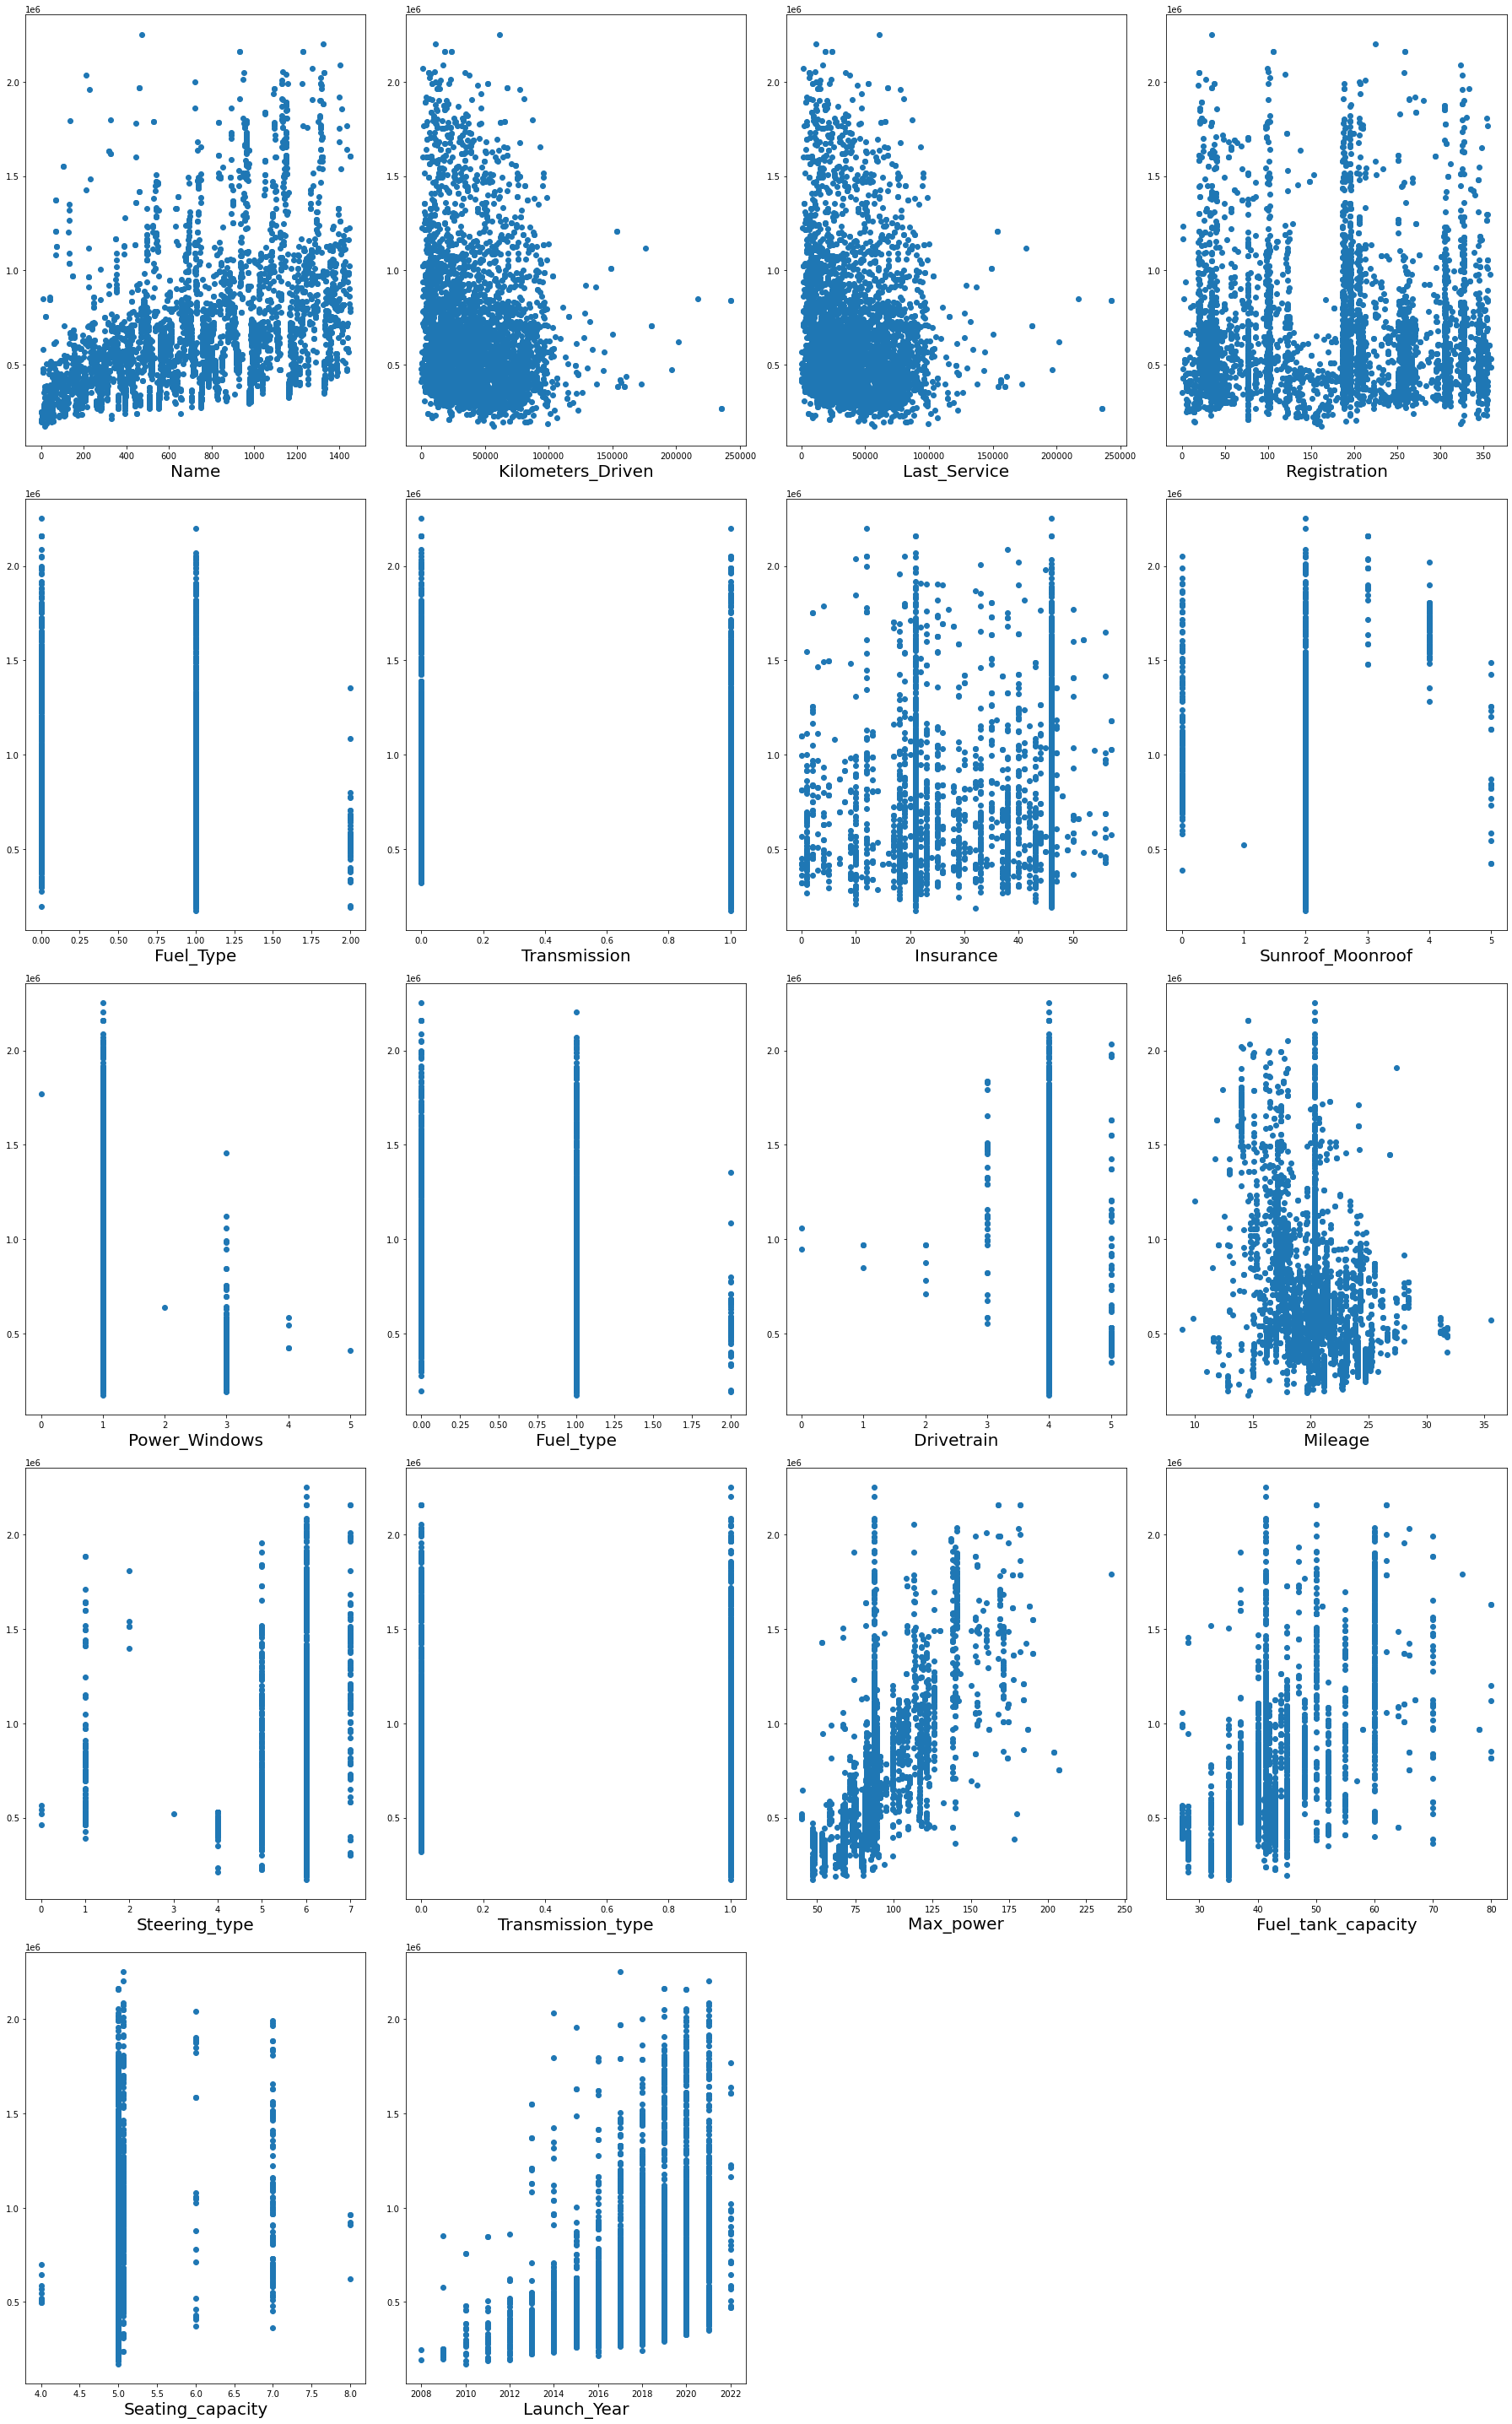

In [115]:
plt.figure(figsize=(25,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 18:
        ax = plt.subplot(5,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Registration, Insurance, Sunroof_Moonroof and Steering_type columns has Low/No co-relation with Label.

In [116]:
for i in df.columns:
    a = df[i].corr(df['Price'])
    print(i,'=',a)

Price = 0.9999999999999999
Name = 0.3971355787220482
Kilometers_Driven = -0.13787167374600678
Last_Service = -0.13787167374600678
Registration = -0.02613201988798894
Fuel_Type = -0.348034009426528
Transmission = -0.3926693250812212
Insurance = -0.013078700273133721
Sunroof_Moonroof = 0.027354977693554185
Power_Windows = -0.404811675323973
Fuel_type = -0.348034009426528
Drivetrain = -0.09113805182441742
Mileage = -0.3737387229366964
Steering_type = -0.009222084876425595
Transmission_type = -0.3397901202523662
Max_power = 0.7302504131444731
Fuel_tank_capacity = 0.6054681657417958
Seating_capacity = 0.19026584310088804
Launch_Year = 0.40727124071495746


- Name, Fuel_Type, Transmission, Power_Windows, Mileage, Max_power, Fuel_tank_capacity and Launch_Year has high co-relation with Label.
- Registration, Insurance, Sunroof_Moonroof and Steering_type columns has Low/No co-relation with Label.

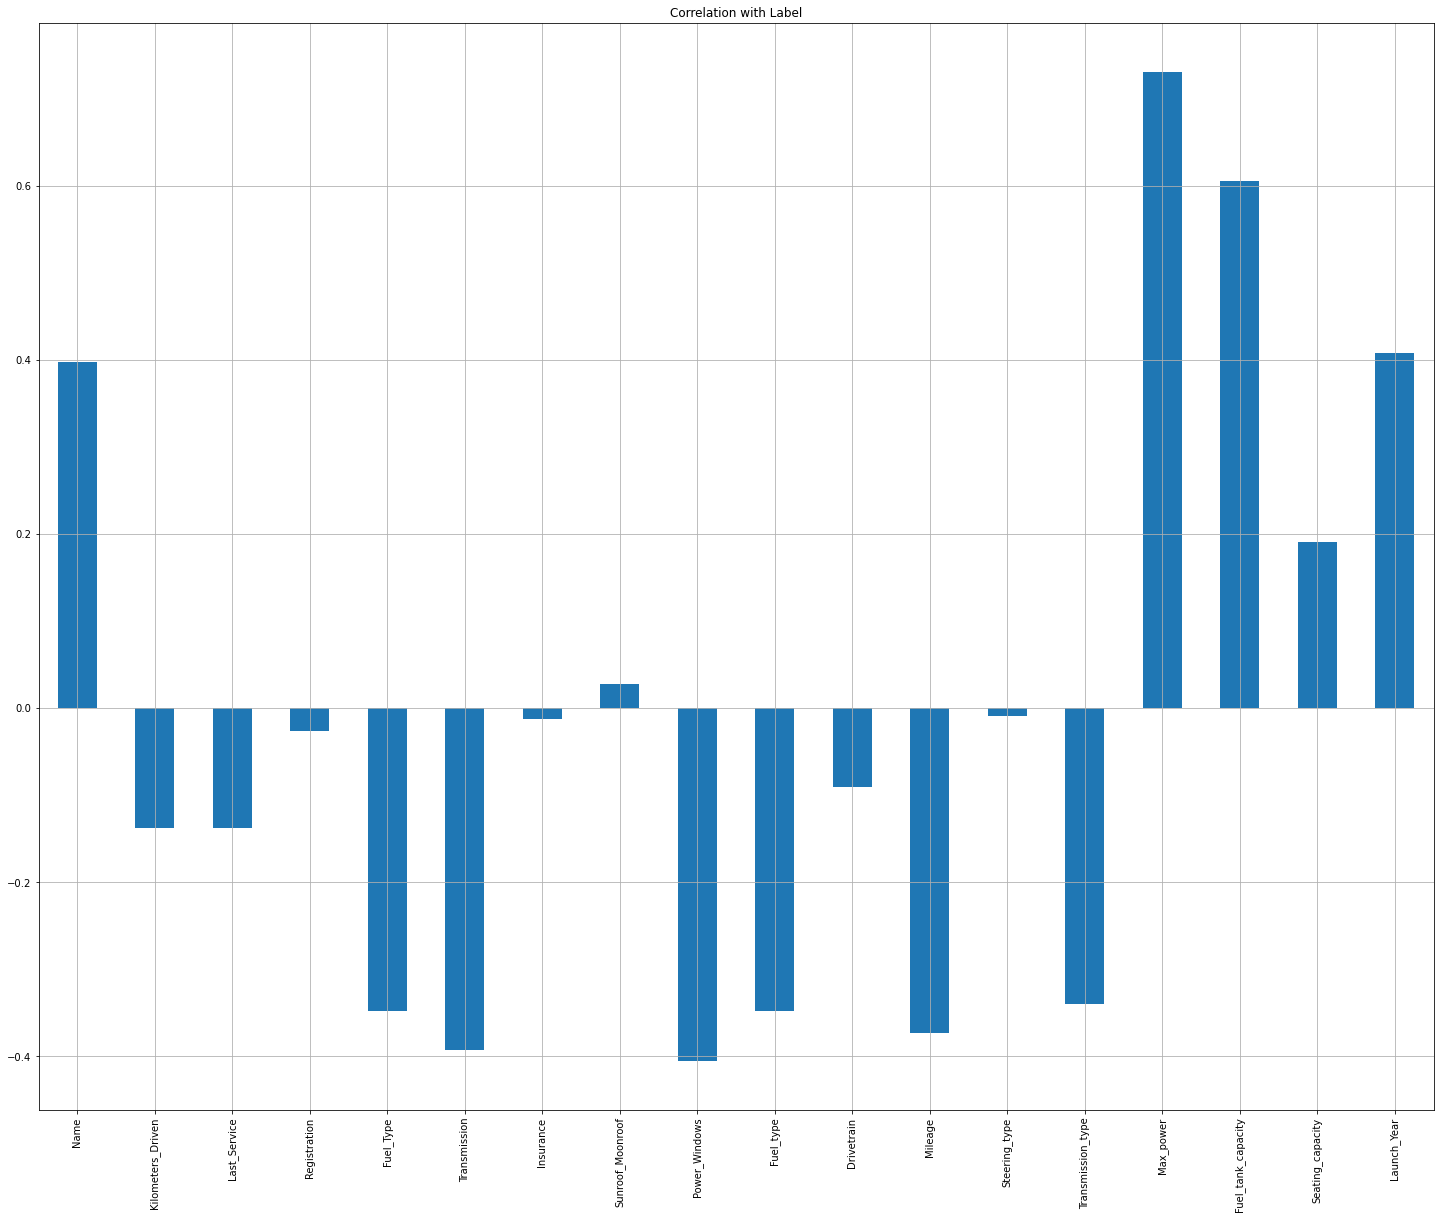

In [117]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(25,20),
                                                     title="Correlation with Label")
plt.show()

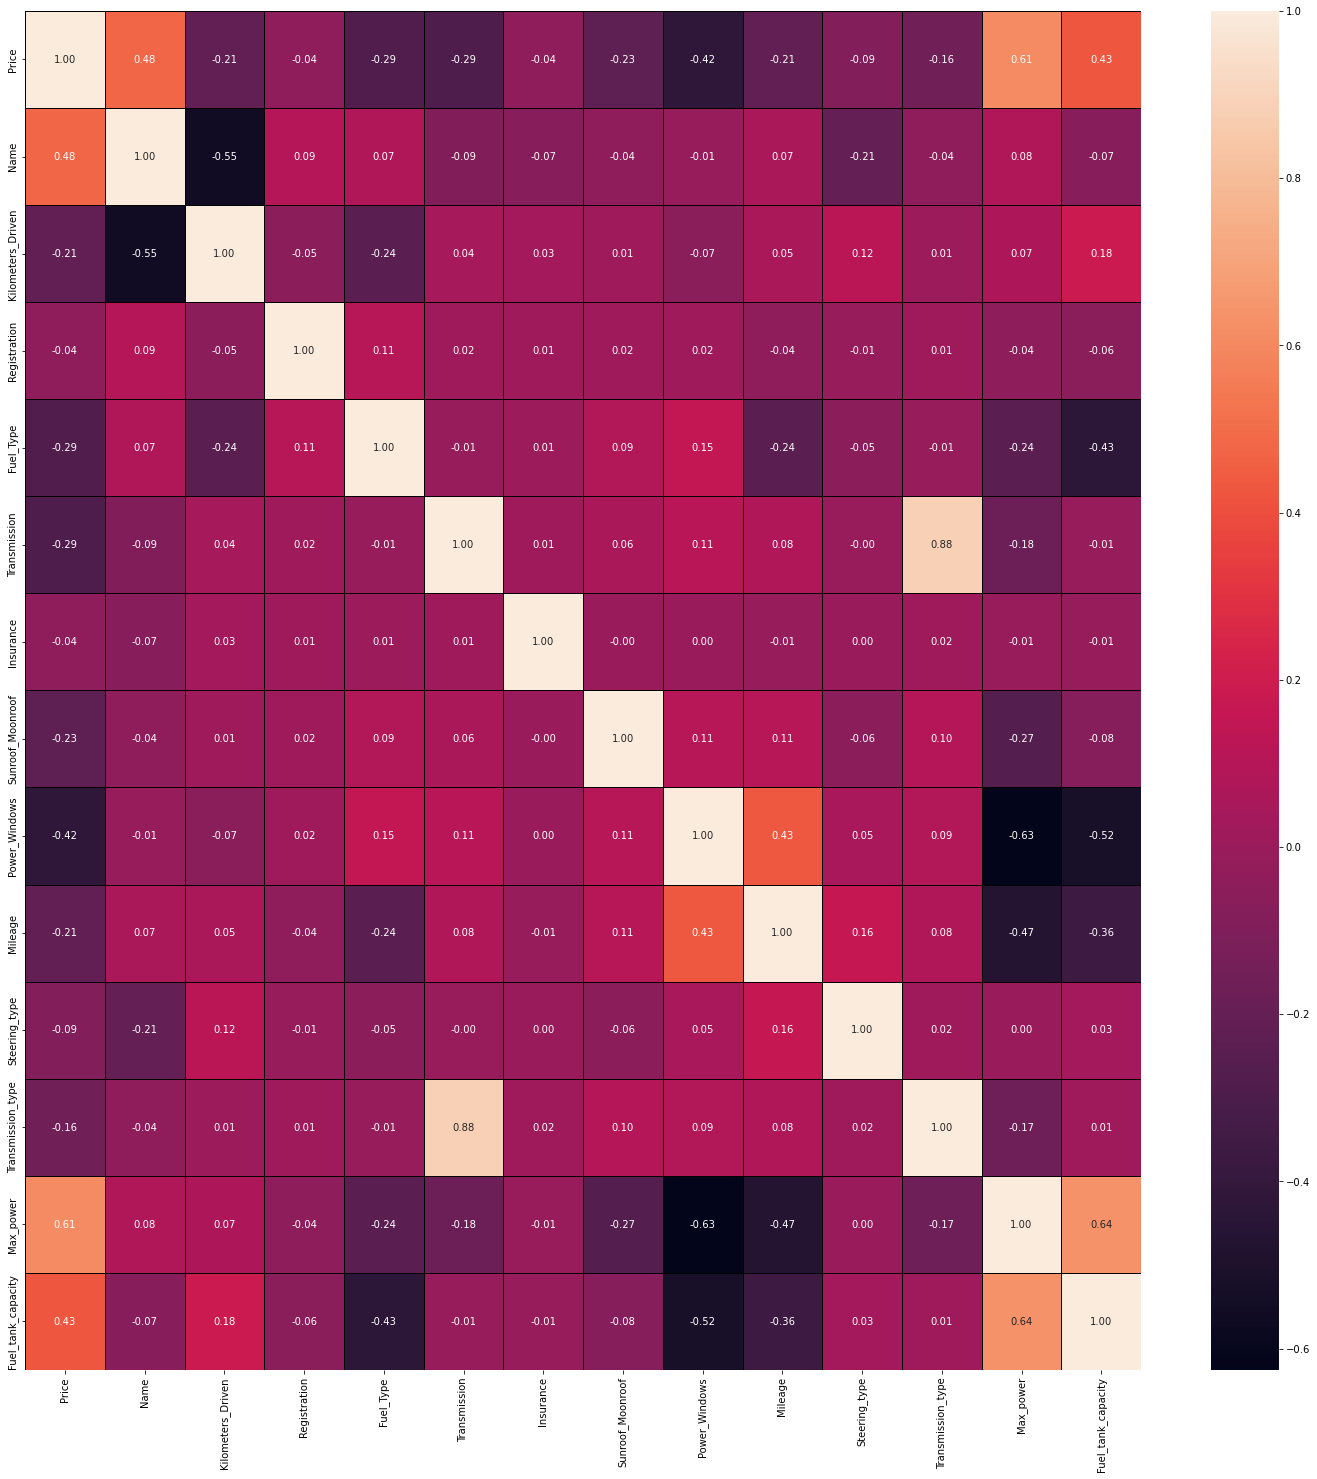

In [166]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

- Transmission_type and Transmission has Multicollinearity problem 

In [167]:
df.columns

Index(['Price', 'Name', 'Kilometers_Driven', 'Registration', 'Fuel_Type',
       'Transmission', 'Insurance', 'Sunroof_Moonroof', 'Power_Windows',
       'Mileage', 'Steering_type', 'Transmission_type', 'Max_power',
       'Fuel_tank_capacity'],
      dtype='object')

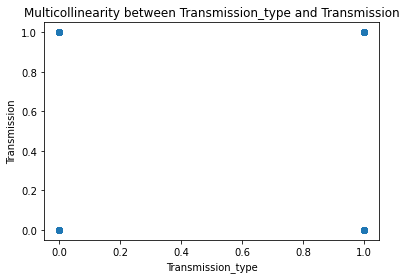

In [168]:
x = df['Transmission_type']
y = df['Transmission']
plt.scatter(x,y)
plt.xlabel('Transmission_type')
plt.ylabel('Transmission')
plt.title('Multicollinearity between Transmission_type and Transmission')
plt.show()

In [119]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
9,Fuel_type,inf
4,Fuel_Type,inf
2,Last_Service,inf
1,Kilometers_Driven,inf
17,Launch_Year,1064.434545
10,Drivetrain,317.320632
16,Seating_capacity,246.702779
11,Mileage,100.876395
15,Fuel_tank_capacity,83.207564
14,Max_power,47.573017


In [120]:
df = df.drop('Fuel_type',axis=1)

In [121]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,Last_Service,inf
1,Kilometers_Driven,inf
16,Launch_Year,1064.434545
9,Drivetrain,317.320632
15,Seating_capacity,246.702779
10,Mileage,100.876395
14,Fuel_tank_capacity,83.207564
13,Max_power,47.573017
11,Steering_type,41.284948
12,Transmission_type,37.970066


In [122]:
df = df.drop('Last_Service',axis=1)

In [123]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
15,Launch_Year,1064.434545
8,Drivetrain,317.320632
14,Seating_capacity,246.702779
9,Mileage,100.876395
13,Fuel_tank_capacity,83.207564
12,Max_power,47.573017
10,Steering_type,41.284948
11,Transmission_type,37.970066
4,Transmission,33.457883
6,Sunroof_Moonroof,14.348947


In [124]:
df = df.drop('Launch_Year',axis=1)

In [125]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
14,Seating_capacity,170.194001
8,Drivetrain,168.942019
13,Fuel_tank_capacity,82.146962
9,Mileage,69.398573
12,Max_power,42.648378
10,Steering_type,40.290352
11,Transmission_type,37.791141
4,Transmission,33.428624
6,Sunroof_Moonroof,14.299833
0,Name,7.652595


In [126]:
df = df.drop('Seating_capacity',axis=1)

In [127]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
8,Drivetrain,129.371236
13,Fuel_tank_capacity,75.750148
9,Mileage,66.522659
12,Max_power,42.202889
10,Steering_type,39.940666
11,Transmission_type,37.760323
4,Transmission,33.420938
6,Sunroof_Moonroof,14.289748
0,Name,7.602727
3,Fuel_Type,7.296219


In [128]:
df = df.drop('Drivetrain',axis=1)

In [129]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
12,Fuel_tank_capacity,70.259451
8,Mileage,46.639780
11,Max_power,40.829531
9,Steering_type,39.249814
10,Transmission_type,37.635475
4,Transmission,33.415277
6,Sunroof_Moonroof,14.053437
0,Name,7.570459
5,Insurance,6.681893
3,Fuel_Type,5.898301


Deleting these columns one by one to reduce VIF from the dataset.

- Drivetrain, Seating_capacity, Launch_Year, Last_Service and Fuel_type

In [131]:
df

,Price,Name,Kilometers_Driven,Registration,Fuel_Type,Transmission,Insurance,Sunroof_Moonroof,Power_Windows,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity
0,337599,977.0,79205,48.0,2.0,1.0,46.0,2.0,3.0,24.700000,6.0,1.0,48.000000,35.000000
1,1056899,1186.0,11707,345.0,1.0,1.0,46.0,2.0,1.0,20.348708,6.0,1.0,87.281931,41.378927
2,1589699,890.0,13878,187.0,1.0,1.0,46.0,2.0,1.0,16.500000,6.0,0.0,140.000000,47.000000
3,1879099,1148.0,11086,196.0,1.0,1.0,46.0,3.0,1.0,20.348708,6.0,0.0,141.000000,60.000000
4,708299,803.0,41249,264.0,1.0,0.0,46.0,2.0,1.0,21.210000,6.0,0.0,82.000000,37.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,643699,1060.0,36655,100.0,1.0,1.0,21.0,2.0,1.0,23.840000,6.0,1.0,84.000000,35.000000
4405,604199,405.0,69472,187.0,1.0,0.0,21.0,2.0,1.0,19.560000,1.0,0.0,81.800000,37.000000
4406,853599,1364.0,5091,188.0,1.0,1.0,21.0,2.0,1.0,17.030000,1.0,1.0,103.260000,48.000000
4407,603699,585.0,29104,187.0,1.0,1.0,21.0,2.0,1.0,21.210000,6.0,1.0,82.000000,37.000000


In [130]:
x = df.drop('Price',axis=1)
y = df['Price']

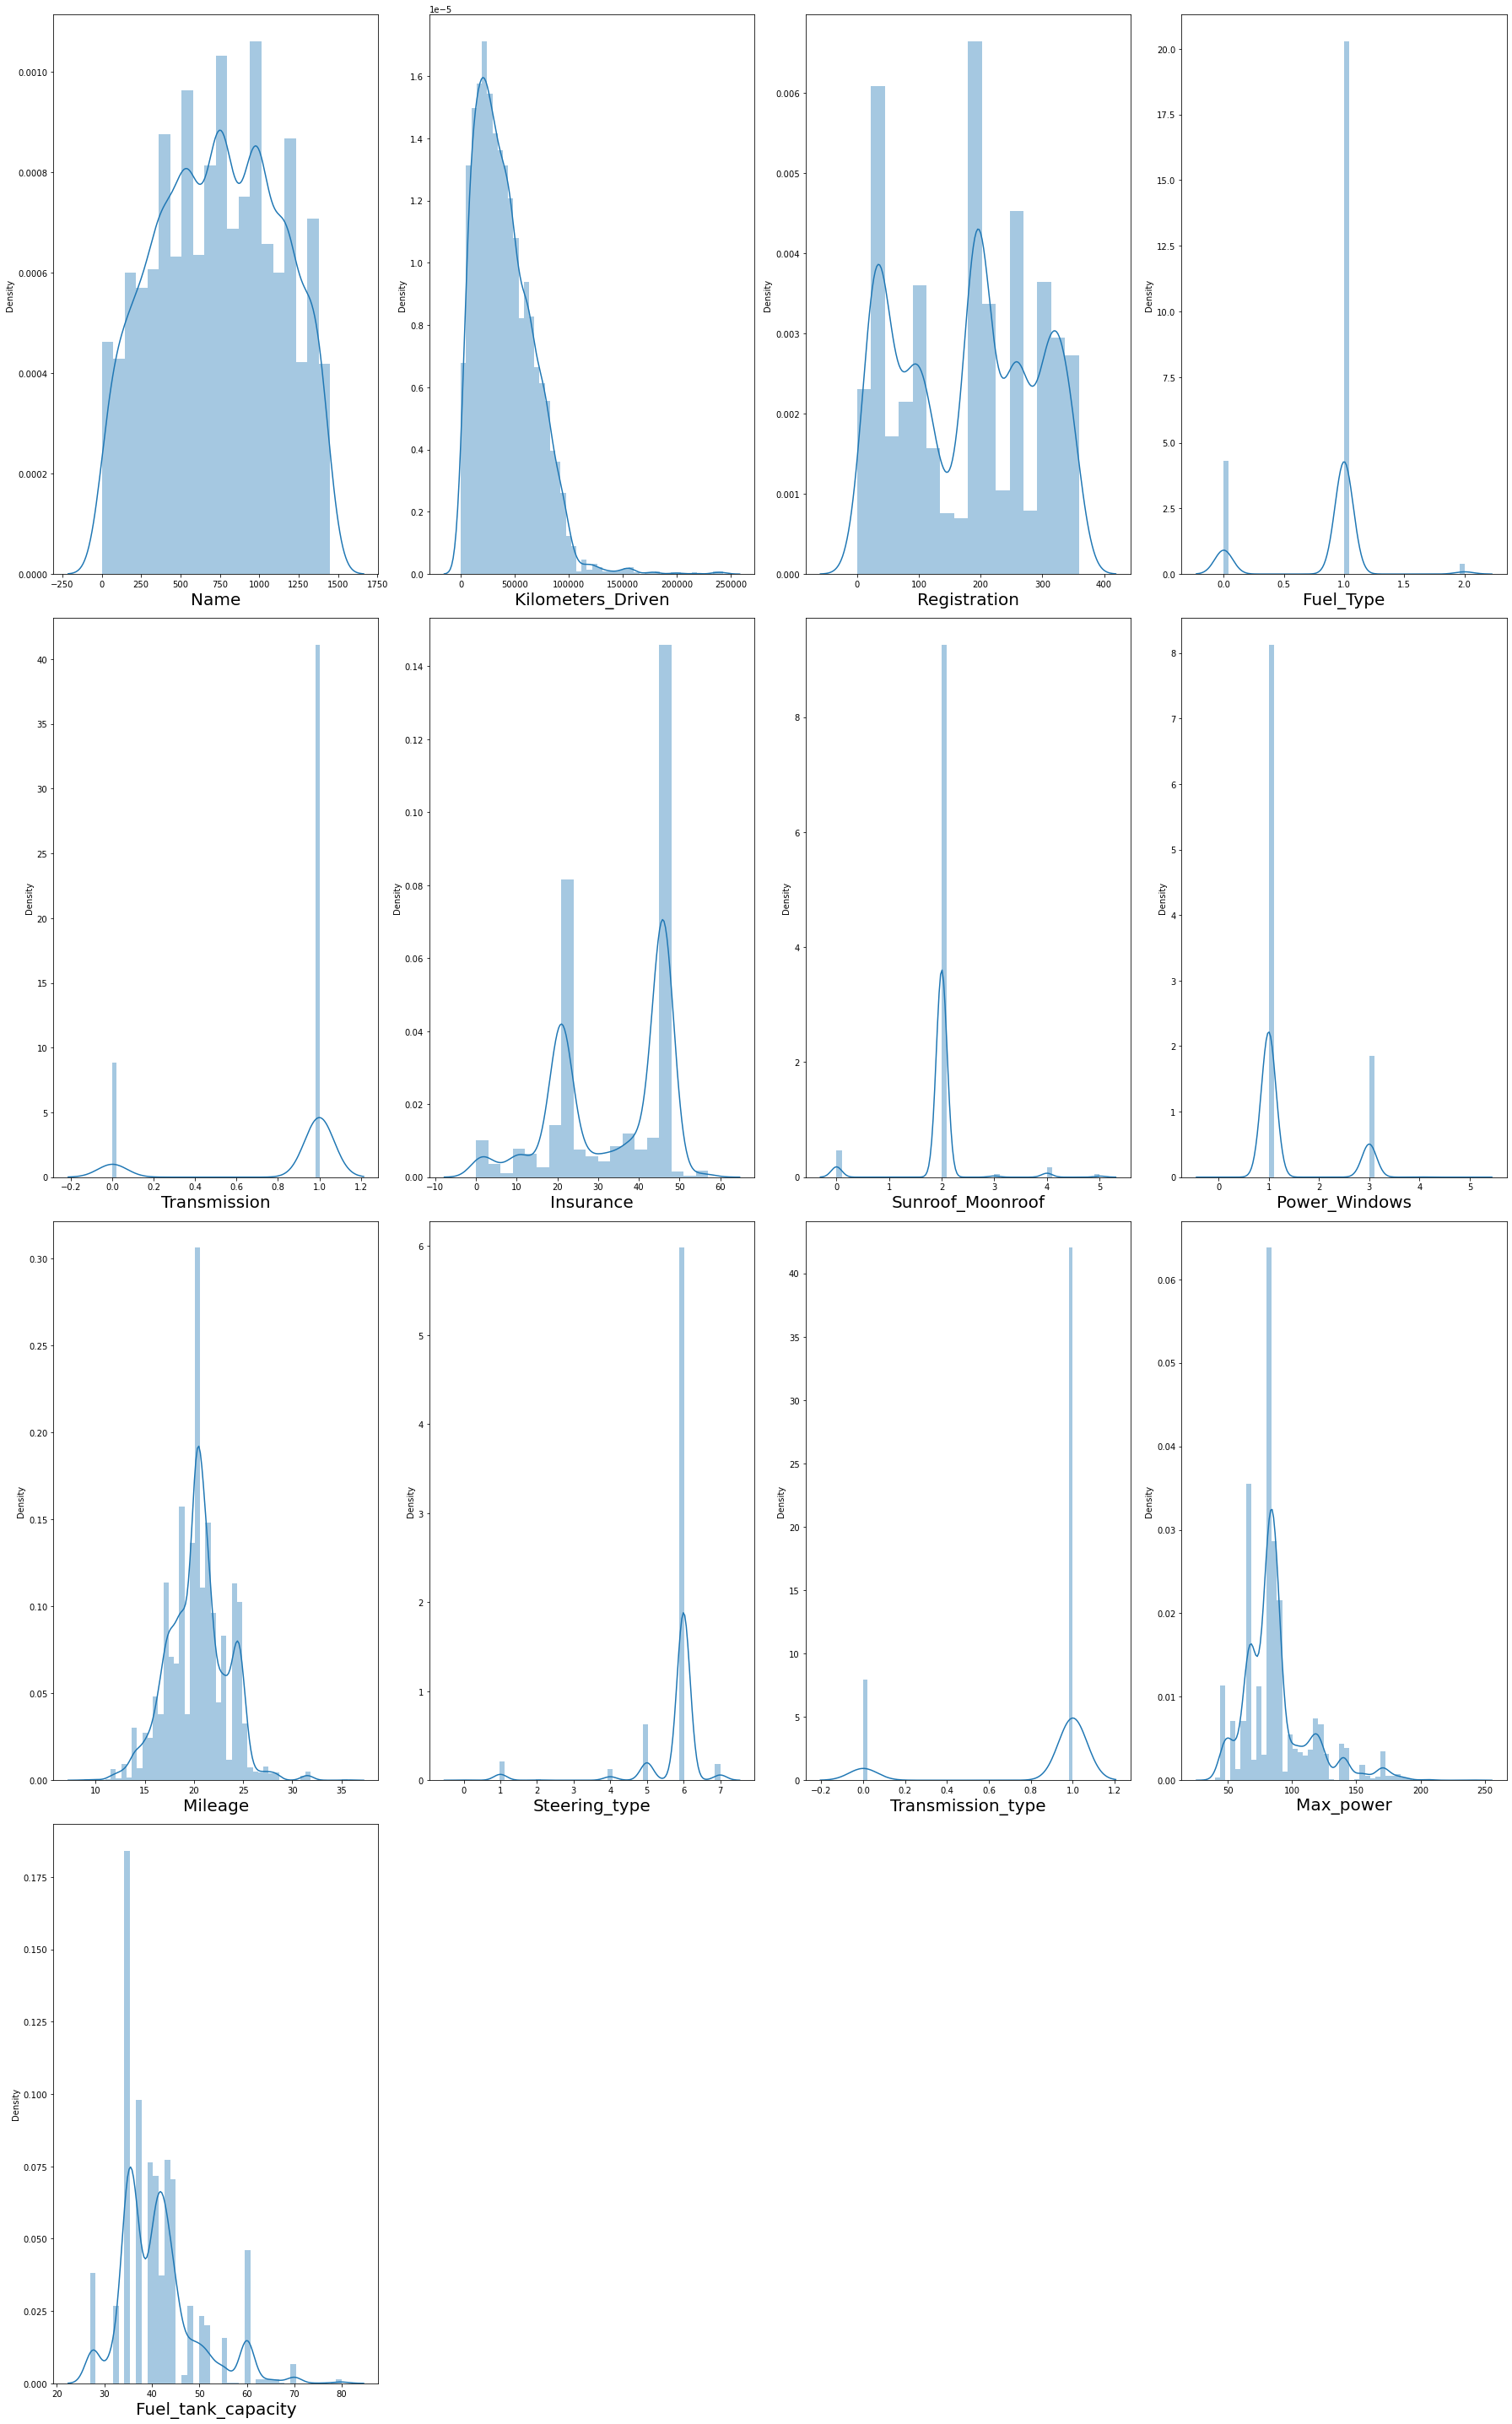

In [132]:
plt.figure(figsize=(25,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [133]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

Price = 1.5283538565208503
Name = -0.04499556646526514
Kilometers_Driven = 1.2745889548113183
Registration = -0.0183436719157604
Fuel_Type = -1.1372243790287218
Transmission = -1.6898684909473625
Insurance = -0.5436849312158353
Sunroof_Moonroof = -0.3684005541026811
Power_Windows = 1.6248449443874342
Mileage = 0.08432065037061806
Steering_type = -3.9960390541366597
Transmission_type = -1.8634271510542266
Max_power = 1.454121727378636
Fuel_tank_capacity = 1.1907958191669374


Not considering skewness of categorical data columns
- Kilometers_Driven, Max_power and Fuel_tank_capacity has skewness

In [134]:
df.describe()

,Price,Name,Kilometers_Driven,Registration,Fuel_Type,Transmission,Insurance,Sunroof_Moonroof,Power_Windows,Mileage,Steering_type,Transmission_type,Max_power,Fuel_tank_capacity
count,4.409000e+03,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,6.820580e+05,738.967340,40774.280336,177.533001,0.843729,0.822636,33.406441,1.962123,1.374235,20.348708,5.746881,0.840780,87.281931,41.378927
std,3.630837e+05,380.316194,27413.116277,106.873544,0.405086,0.382020,13.905009,0.548607,0.783292,2.950122,0.950633,0.365922,25.676546,8.197227
min,1.730990e+05,0.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.860000,0.000000,0.000000,40.000000,27.000000
25%,4.320990e+05,426.000000,19788.000000,77.000000,1.000000,1.000000,21.000000,2.000000,1.000000,18.600000,6.000000,1.000000,68.050000,35.000000
50%,5.715990e+05,751.000000,36107.000000,190.000000,1.000000,1.000000,40.000000,2.000000,1.000000,20.348708,6.000000,1.000000,83.000000,40.000000
75%,8.106990e+05,1030.000000,57946.000000,262.000000,1.000000,1.000000,46.000000,2.000000,1.000000,22.000000,6.000000,1.000000,89.000000,45.000000
max,2.251499e+06,1450.000000,242597.000000,359.000000,2.000000,1.000000,57.000000,5.000000,5.000000,35.600000,7.000000,1.000000,241.000000,80.000000


Database is ready to remove outliers if exist 

In [135]:
x = df.drop(['Price'],axis=1)
y = df['Price']

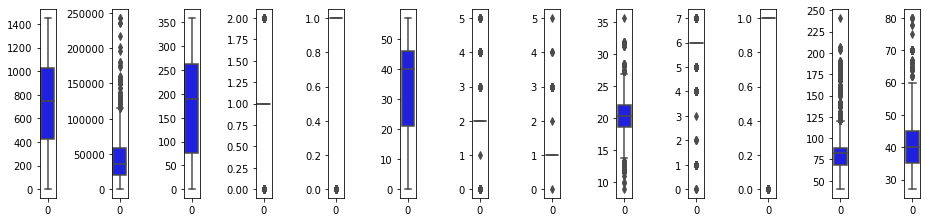

In [136]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

LotFrontage, LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch and PoolArea Column has outliers

In [137]:
df.columns

Index(['Price', 'Name', 'Kilometers_Driven', 'Registration', 'Fuel_Type',
       'Transmission', 'Insurance', 'Sunroof_Moonroof', 'Power_Windows',
       'Mileage', 'Steering_type', 'Transmission_type', 'Max_power',
       'Fuel_tank_capacity'],
      dtype='object')

In [138]:
old_data = (df.shape)[0]

In [139]:
q1 = df['Kilometers_Driven'].quantile(0.25)
q3 = df['Kilometers_Driven'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Kilometers_Driven'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Kilometers_Driven'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Kilometers_Driven

In [140]:
q1 = df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Mileage'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Mileage'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Mileage

In [141]:
q1 = df['Max_power'].quantile(0.25)
q3 = df['Max_power'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Max_power'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Max_power'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Max_power

In [142]:
q1 = df['Fuel_tank_capacity'].quantile(0.25)
q3 = df['Fuel_tank_capacity'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Fuel_tank_capacity'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Fuel_tank_capacity'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Fuel_tank_capacity

In [143]:
new_data = (df.shape)[0]

In [144]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 622


Data Loss is very huge

In [145]:
x = df.drop(['Price'],axis=1)
y = df['Price']

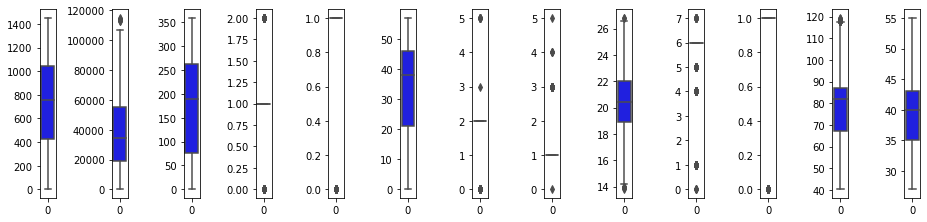

In [146]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Cleared all the outliers

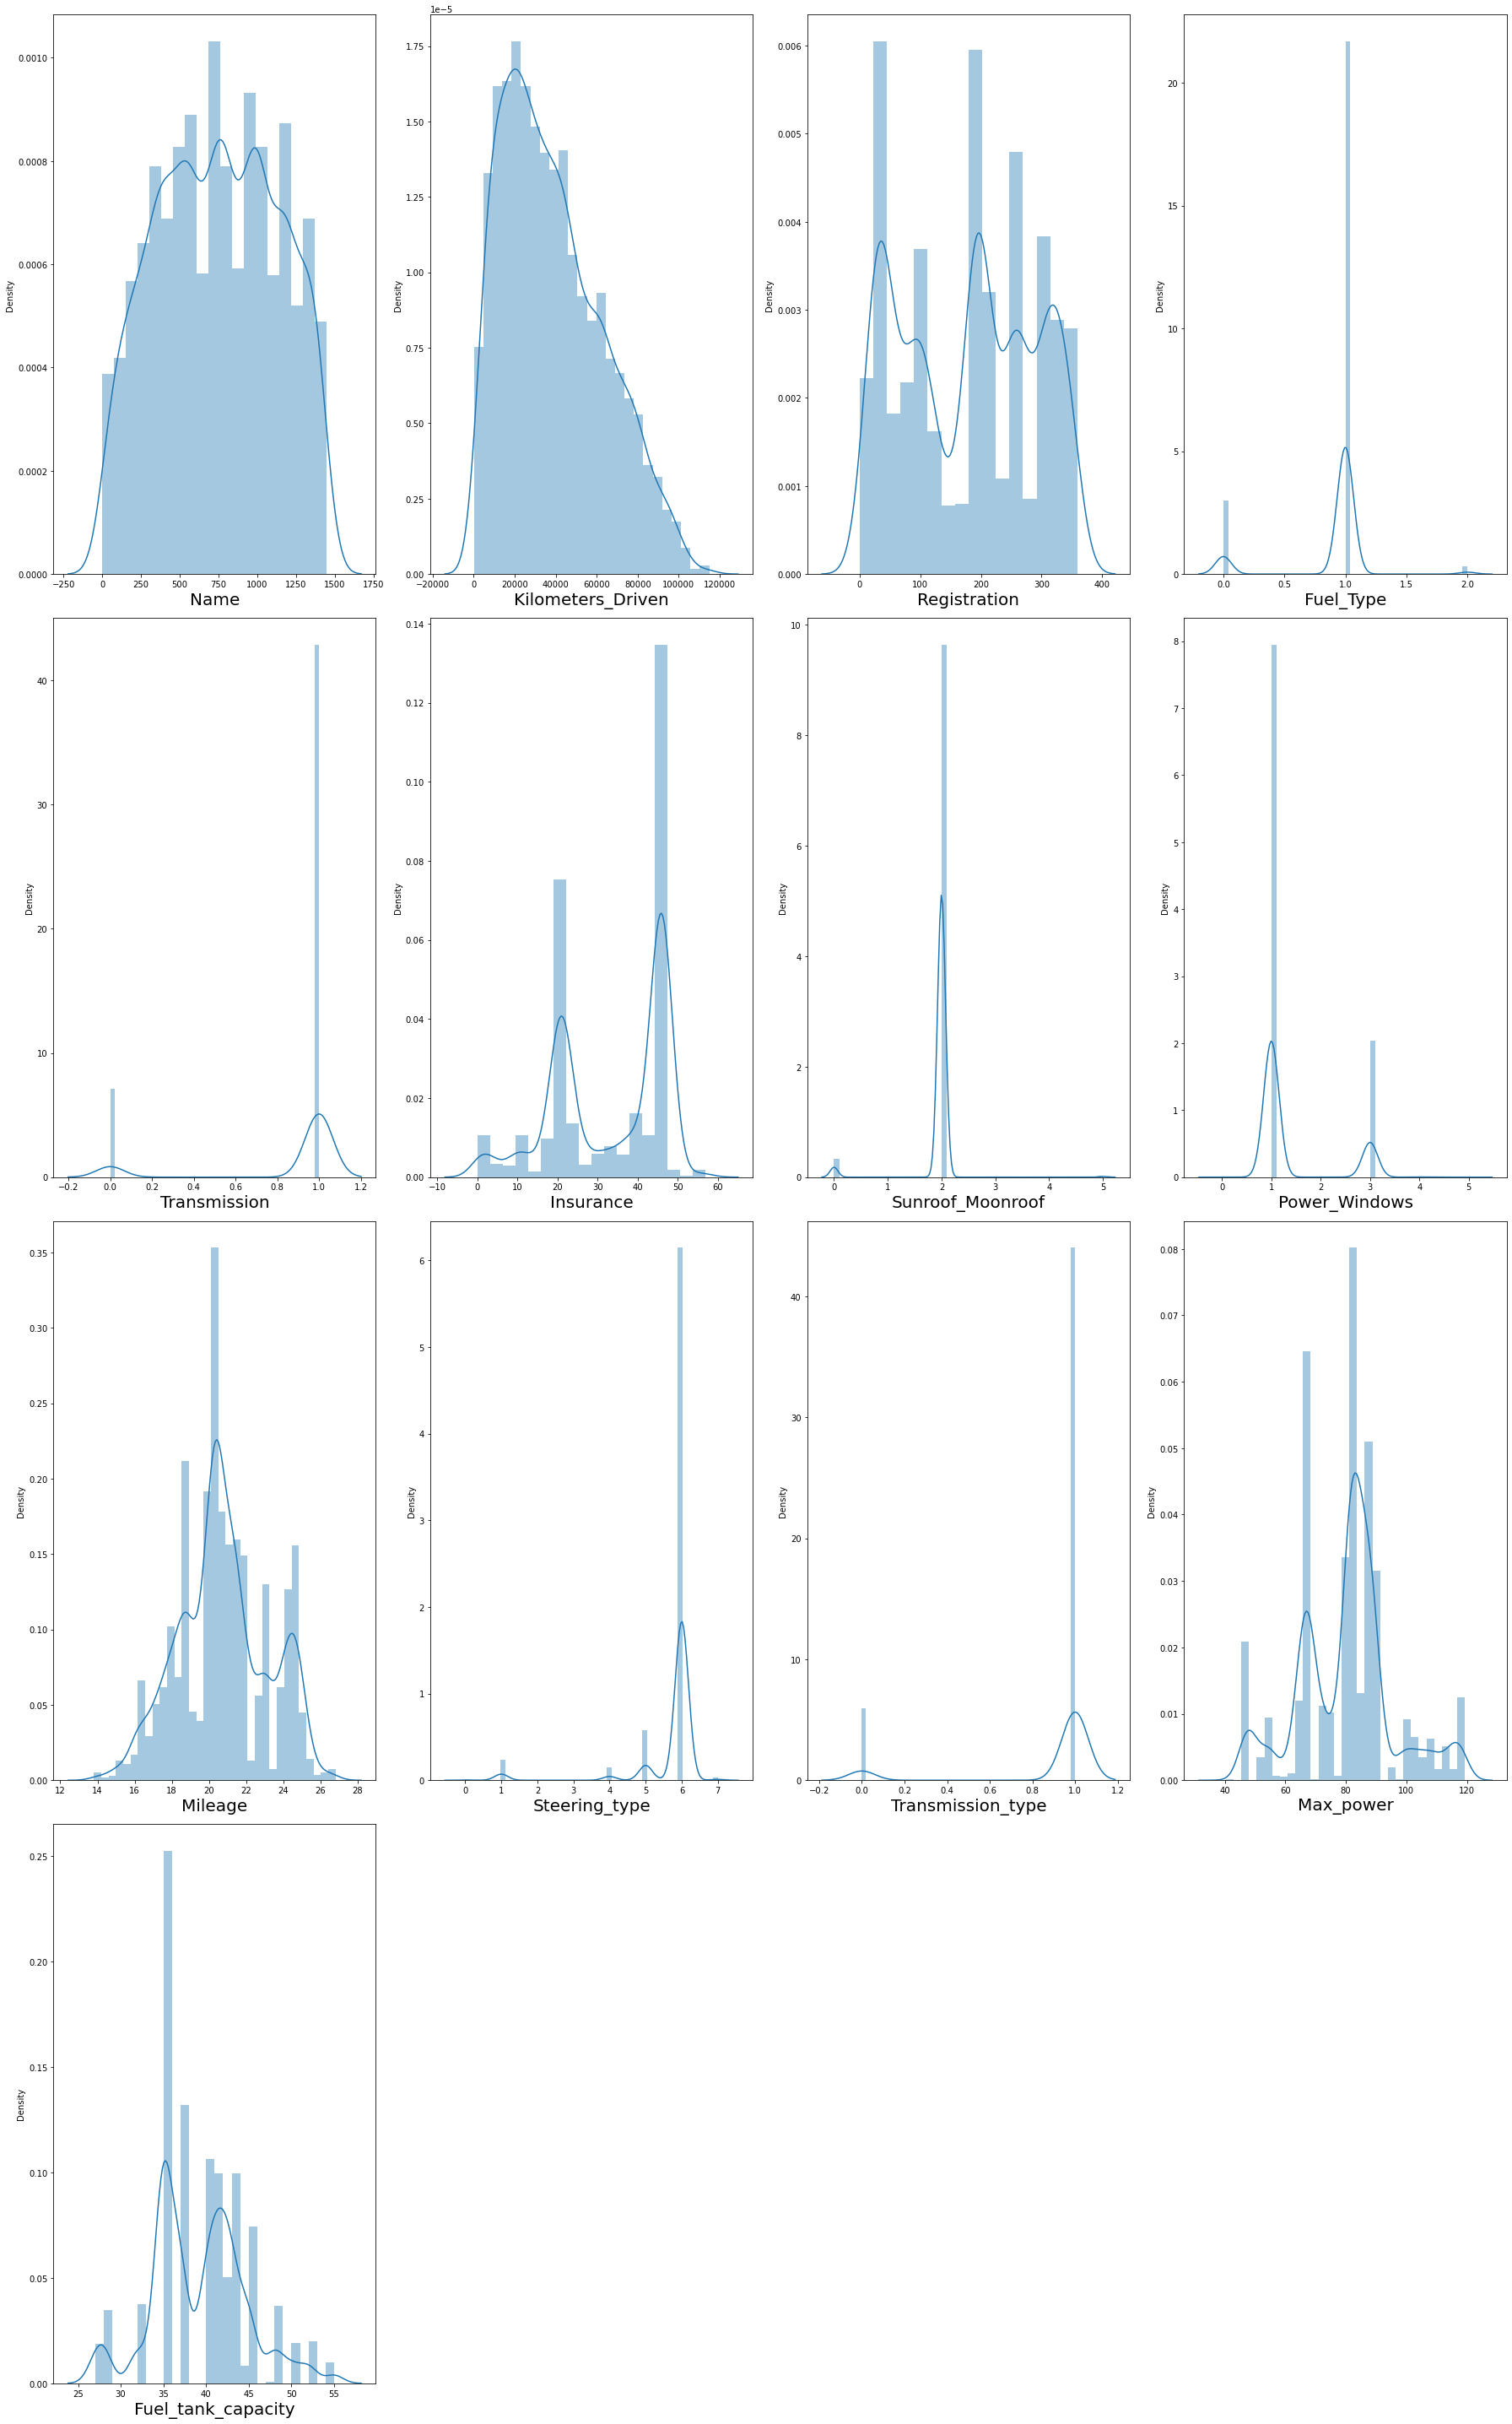

In [147]:
plt.figure(figsize=(25,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 13:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from data

In [149]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [150]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [151]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.6771306545234904
At Random state 0 the testing accuracy is :- 0.6613351540352321


At Random state 1 the training accuracy is :- 0.6705907459256895
At Random state 1 the testing accuracy is :- 0.682045907127905


At Random state 2 the training accuracy is :- 0.6798278403214609
At Random state 2 the testing accuracy is :- 0.655529825540211


At Random state 3 the training accuracy is :- 0.6782236761341629
At Random state 3 the testing accuracy is :- 0.6565851443128609


At Random state 4 the training accuracy is :- 0.6730477129664728
At Random state 4 the testing accuracy is :- 0.674315665787206


At Random state 5 the training accuracy is :- 0.6785862133610051
At Random state 5 the testing accuracy is :- 0.6530526799194765


At Random state 6 the training accuracy is :- 0.6598728138756187
At Random state 6 the testing accuracy is :- 0.7181871104535547


At Random state 7 the training accuracy is :- 0.6752160502284252
At Random state 7 the

In [152]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 66)

In [153]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [154]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 67.35%

===============Test Result===============
Accuracy Score: 67.33%

 mean_absolute_error 102376.51939422284

 mean_squared_error 28665347329.86425


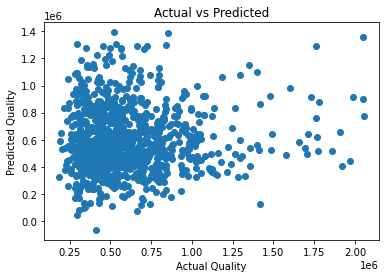

In [155]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

#### Regularization

In [156]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.6732558653085605

In [157]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.6732559103086874

# Support Vector Regression

In [158]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: -5.74%

===============Test Result===============
Accuracy Score: -4.99%

 mean_absolute_error 205857.07725353728

 mean_squared_error 92104971953.68492


# DecisionTreeRegressor

In [159]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 76.61%

 mean_absolute_error 61022.305174234425

 mean_squared_error 20520848167.263992


# AdaBoostRegressor

In [160]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 57.60%

===============Test Result===============
Accuracy Score: 55.07%

 mean_absolute_error 153793.32955713593

 mean_squared_error 39415070278.03112


# GradientBoostingRegressor

In [161]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 85.11%

===============Test Result===============
Accuracy Score: 79.90%

 mean_absolute_error 75192.5135144641

 mean_squared_error 17635591320.572407


# RandomForestRegressor

In [162]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.84%

===============Test Result===============
Accuracy Score: 86.79%

 mean_absolute_error 54218.23786166842

 mean_squared_error 11587753426.816917


# KNeighborsRegressor

In [163]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

print_score(knr,x_train,x_test,y_train,y_test, train=True)
print_score(knr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 82.39%

===============Test Result===============
Accuracy Score: 71.56%

 mean_absolute_error 89830.3626187962

 mean_squared_error 24947042897.9007


# Findings

- LinearRegression train accuracy score 67.35% and test accuracy score 67.33%
- Support Vector Regression train accuracy score -5.74% and test accuracy score -4.99%
- DecisionTreeRegressor train accuracy score 100.00% and test accuracy score 76.61%
- AdaBoostRegressor train accuracy score 57.60% and test accuracy score 55.07%
- GradientBoostingRegressor train accuracy score 85.11% and test accuracy score 79.90%
- RandomForestRegressor train accuracy score 97.84% and test accuracy score 86.79%
- KNeighborsRegressor train accuracy score 82.39% and test accuracy score 71.56%



# Conclusion 

##### Selecting LinearRegression since the Accuracy score and test scores are greater and close to each other.

### Saving the Model 

In [164]:
file = 'Car_Price_Prediction.pickle'
pickle.dump(reg, open(file, 'wb'))